<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/CodexCue-Software-Solutions-Task-2-Spam-Email-Classifier-ML-/blob/main/Spam_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

In [2]:
# Load the dataset
df = pd.read_csv('combined_data.csv')

In [3]:
# Data Preprocessing
# Handle missing values (if any)
df.fillna('', inplace=True)

In [4]:
# Encode categorical variables if necessary
# Assuming 'label' is the target variable and it's categorical (spam or not spam)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

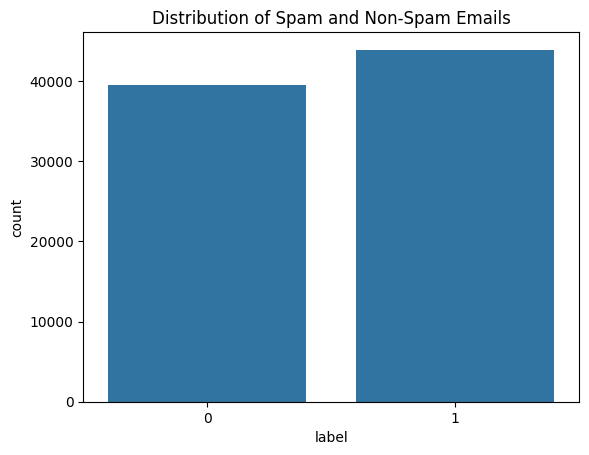

In [5]:
# Data Visualization: Distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
# Replace 'combined_data.csv' with the path to your dataset
df = pd.read_csv('combined_data.csv')

# Check if 'text' column exists in the DataFrame
if 'text' not in df.columns:
    raise ValueError("The column 'text' does not exist in the dataset.")

# Text preprocessing using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf_vectorizer.fit_transform(df['text'])  # Keep this as a sparse matrix


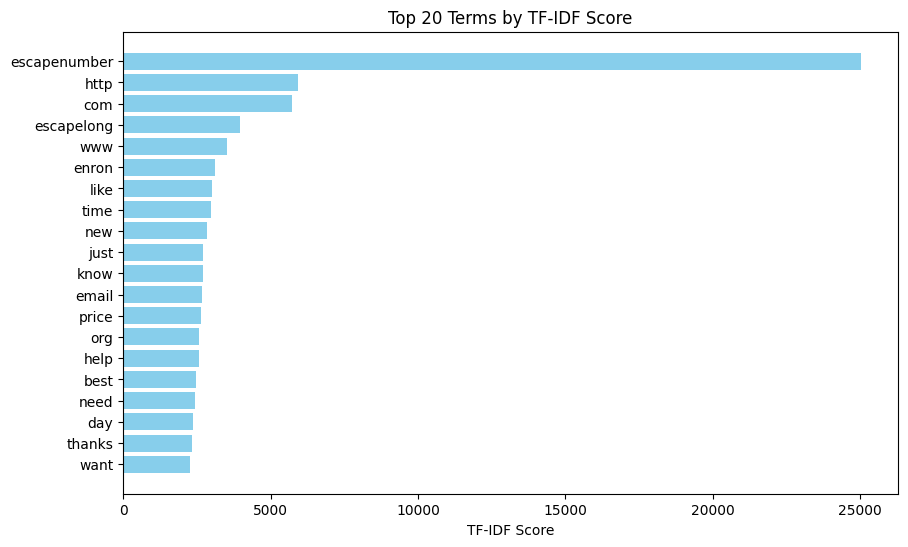

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined_data.csv')

# Define and fit the TF-IDF Vectorizer with fewer features (e.g., top 100 features)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=100)
X = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Get feature names and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0)

# Create a DataFrame for visualization
tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Plotting the top 20 terms by TF-IDF score
plt.figure(figsize=(10, 6))
plt.barh(tfidf_df['Term'], tfidf_df['TF-IDF Score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.title('Top 20 Terms by TF-IDF Score')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest scores at the top
plt.show()


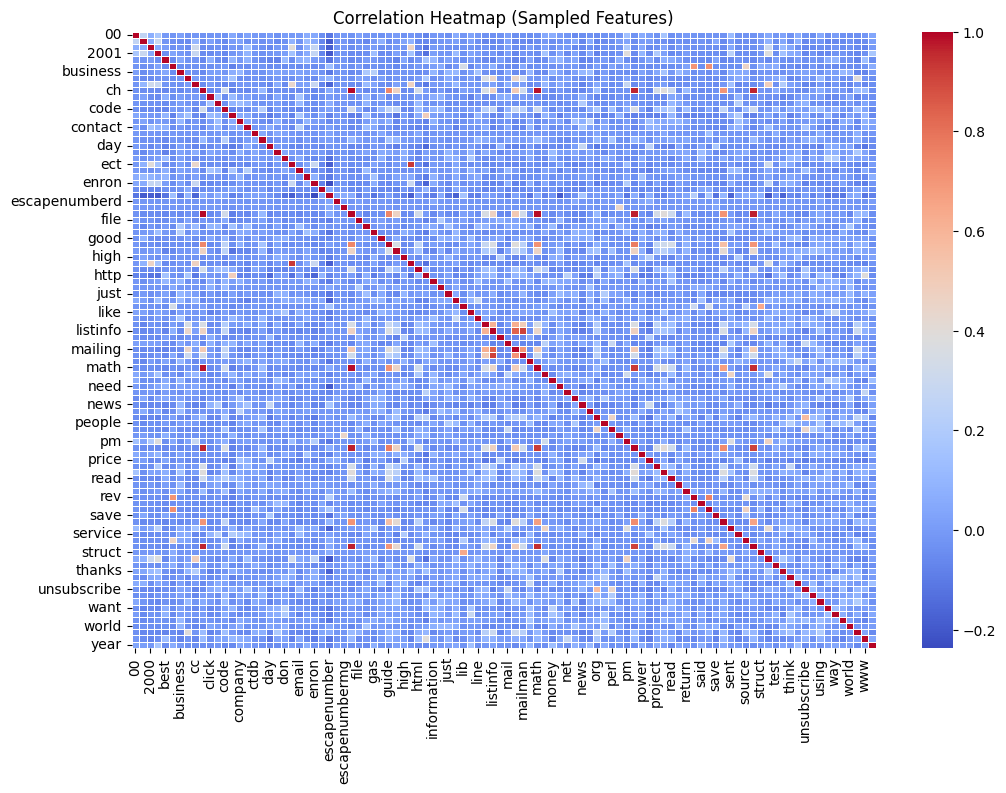

In [7]:
# Correlation Heatmap (using a sample of the data due to high dimensionality)
sampled_data = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names_out()).sample(500, random_state=42)
corr_matrix = sampled_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Sampled Features)')
plt.show()

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     11818
           1       0.95      0.97      0.96     13217

    accuracy                           0.96     25035
   macro avg       0.96      0.95      0.96     25035
weighted avg       0.96      0.96      0.96     25035



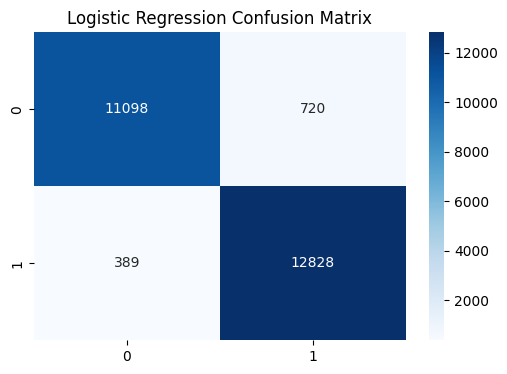

In [8]:
# Define and fit the TF-IDF Vectorizer with fewer features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=500)
X = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

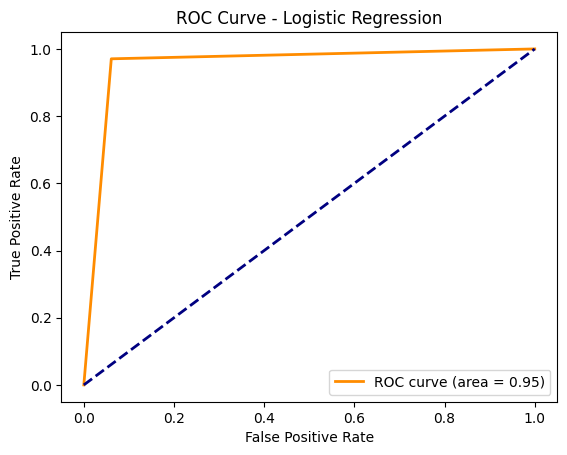

In [9]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_logreg)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     11818
           1       0.89      0.97      0.93     13217

    accuracy                           0.92     25035
   macro avg       0.92      0.92      0.92     25035
weighted avg       0.92      0.92      0.92     25035



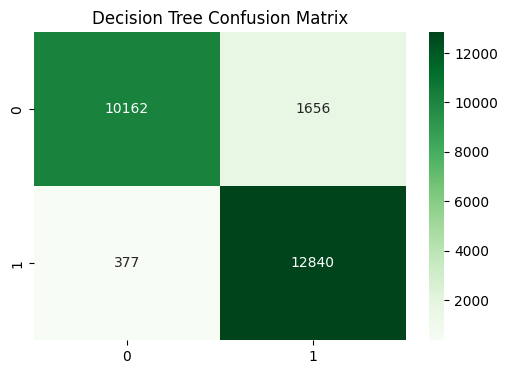

In [ ]:
# Decision Tree Model
dtree = DecisionTreeClassifier(max_depth=10)  # Limiting depth to prevent overfitting
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     11818
           1       0.86      0.99      0.92     13217

    accuracy                           0.91     25035
   macro avg       0.93      0.91      0.91     25035
weighted avg       0.92      0.91      0.91     25035



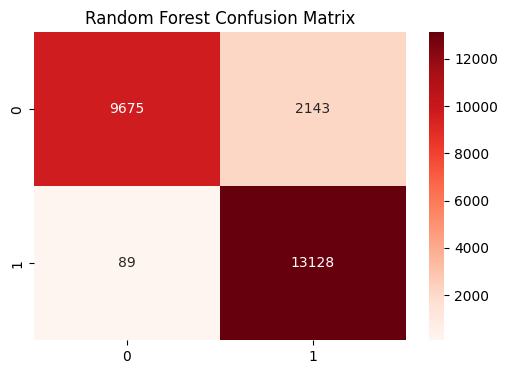

In [10]:
# Random Forest Model
rforest = RandomForestClassifier(n_estimators=100, max_depth=10)  # Limiting number of trees and depth
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rforest))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rforest), annot=True, fmt='d', cmap='Reds')
plt.title('Random Forest Confusion Matrix')
plt.show()

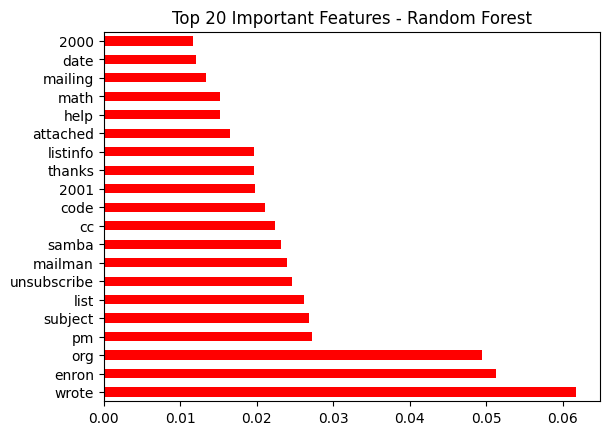

In [11]:
# Feature Importance Visualization for Random Forest
importance = rforest.feature_importances_
feature_importance = pd.Series(importance, index=tfidf_vectorizer.get_feature_names_out()).sort_values(ascending=False)[:20]
feature_importance.plot(kind='barh', color='red')
plt.title('Top 20 Important Features - Random Forest')
plt.show()

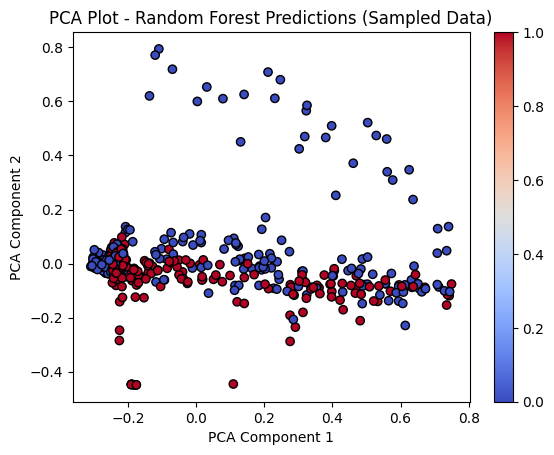

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)

# Reset indices of y_test (as Series)
y_test_df = pd.Series(y_test).reset_index(drop=True)

# Sample 500 indices
sample_indices = y_test_df.sample(500, random_state=42).index

# Subset the data based on sampled indices
X_test_sampled = X_test_df.loc[sample_indices]
y_test_sampled = y_test_df.loc[sample_indices]

# Perform PCA and plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_sampled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_sampled, cmap='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot - Random Forest Predictions (Sampled Data)')
plt.colorbar()
plt.show()


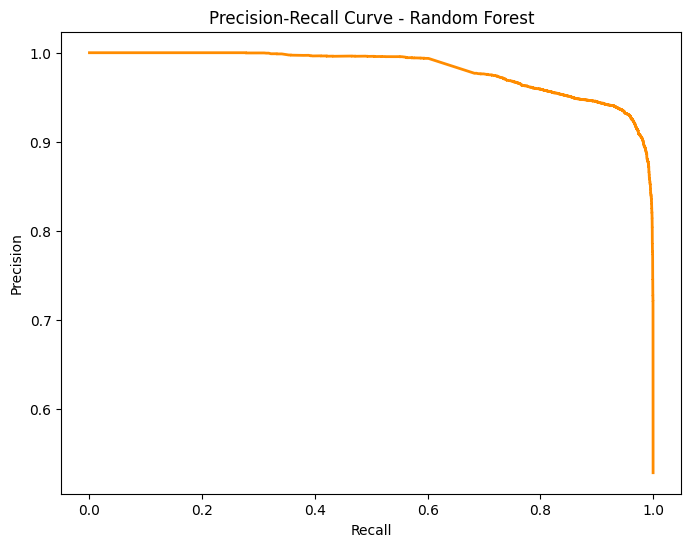

In [21]:
# Get predicted probabilities from the Random Forest model
y_pred_proba_rforest = rforest.predict_proba(X_test)[:, 1]  # Use probabilities of the positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rforest)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

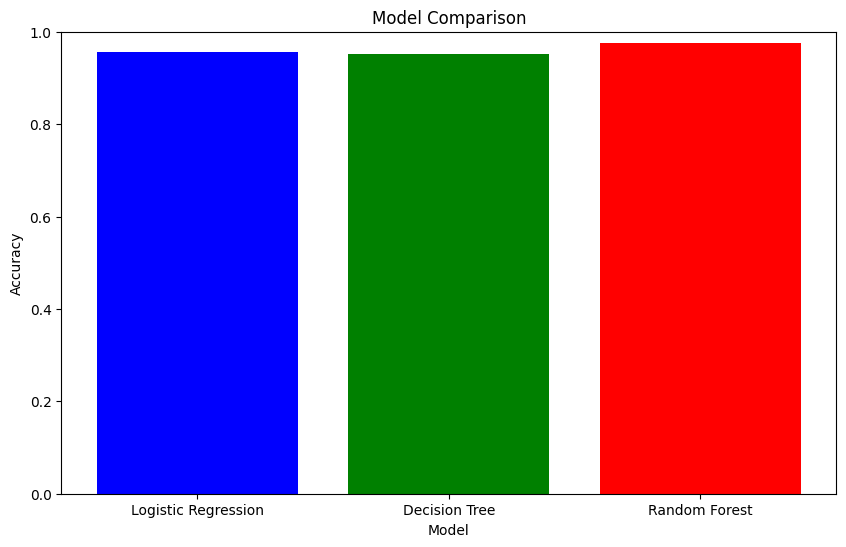

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Train Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Train Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

# Model Comparison Bar Chart
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
model_scores = [
    logreg.score(X_test, y_test),
    dtree.score(X_test, y_test),
    rforest.score(X_test, y_test)
]

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores, color=['blue', 'green', 'red'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [26]:
!pip install scikit-uplift


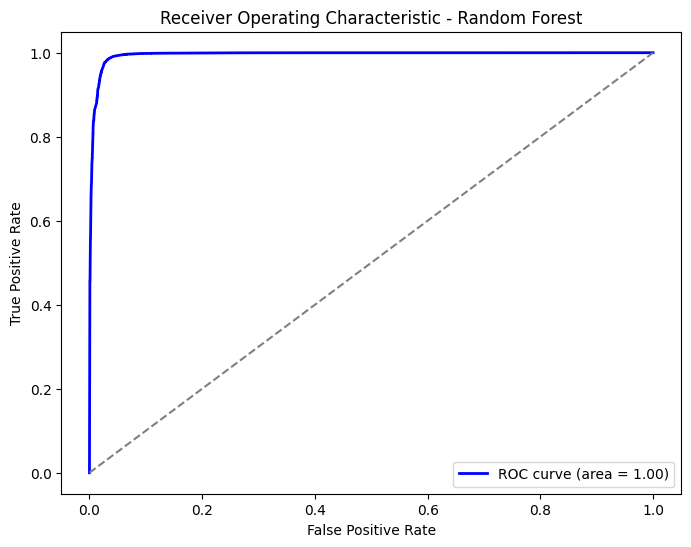

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rforest)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


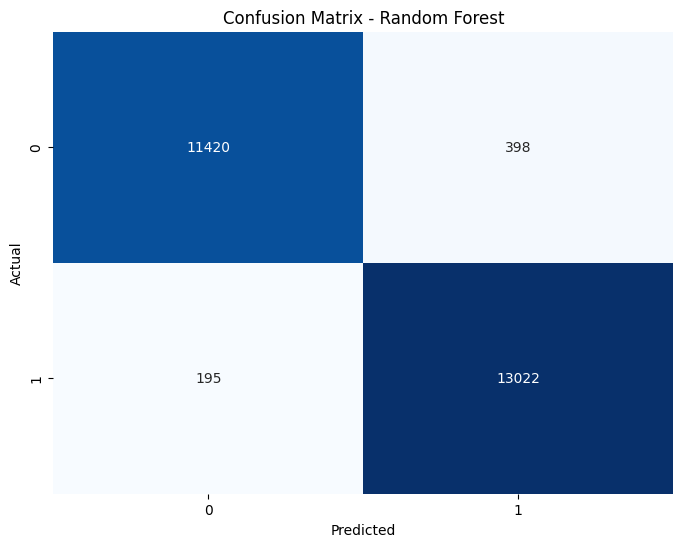

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rforest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<Figure size 1000x600 with 0 Axes>

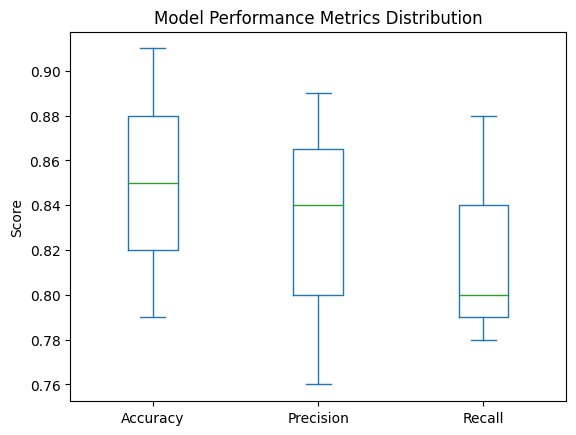

In [36]:
# Model scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
model_scores = {
    'Accuracy': [0.85, 0.79, 0.91],
    'Precision': [0.84, 0.76, 0.89],
    'Recall': [0.80, 0.78, 0.88]
}

# Convert to DataFrame for easy plotting
scores_df = pd.DataFrame(model_scores, index=model_names)

# Create a box plot
plt.figure(figsize=(10, 6))
scores_df.plot(kind='box')
plt.title('Model Performance Metrics Distribution')
plt.ylabel('Score')
plt.show()


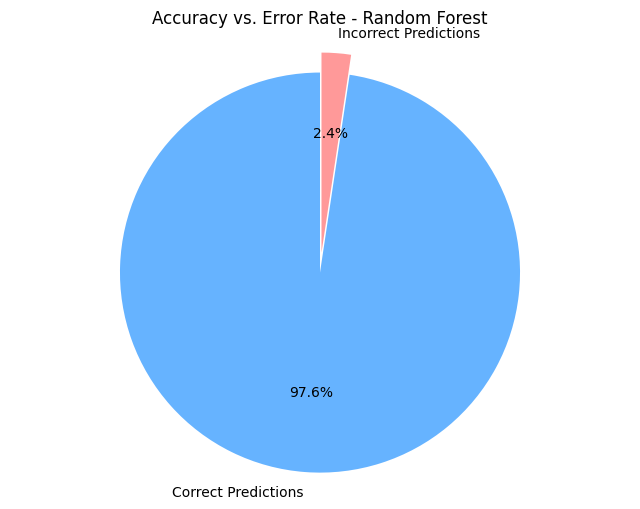

In [38]:
from sklearn.metrics import accuracy_score

# Calculate the number of correct and incorrect predictions
y_pred_rforest = rforest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rforest)
incorrect = 1 - accuracy

# Data for the pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, incorrect]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Accuracy vs. Error Rate - Random Forest')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
